# **Campus Recruitment**

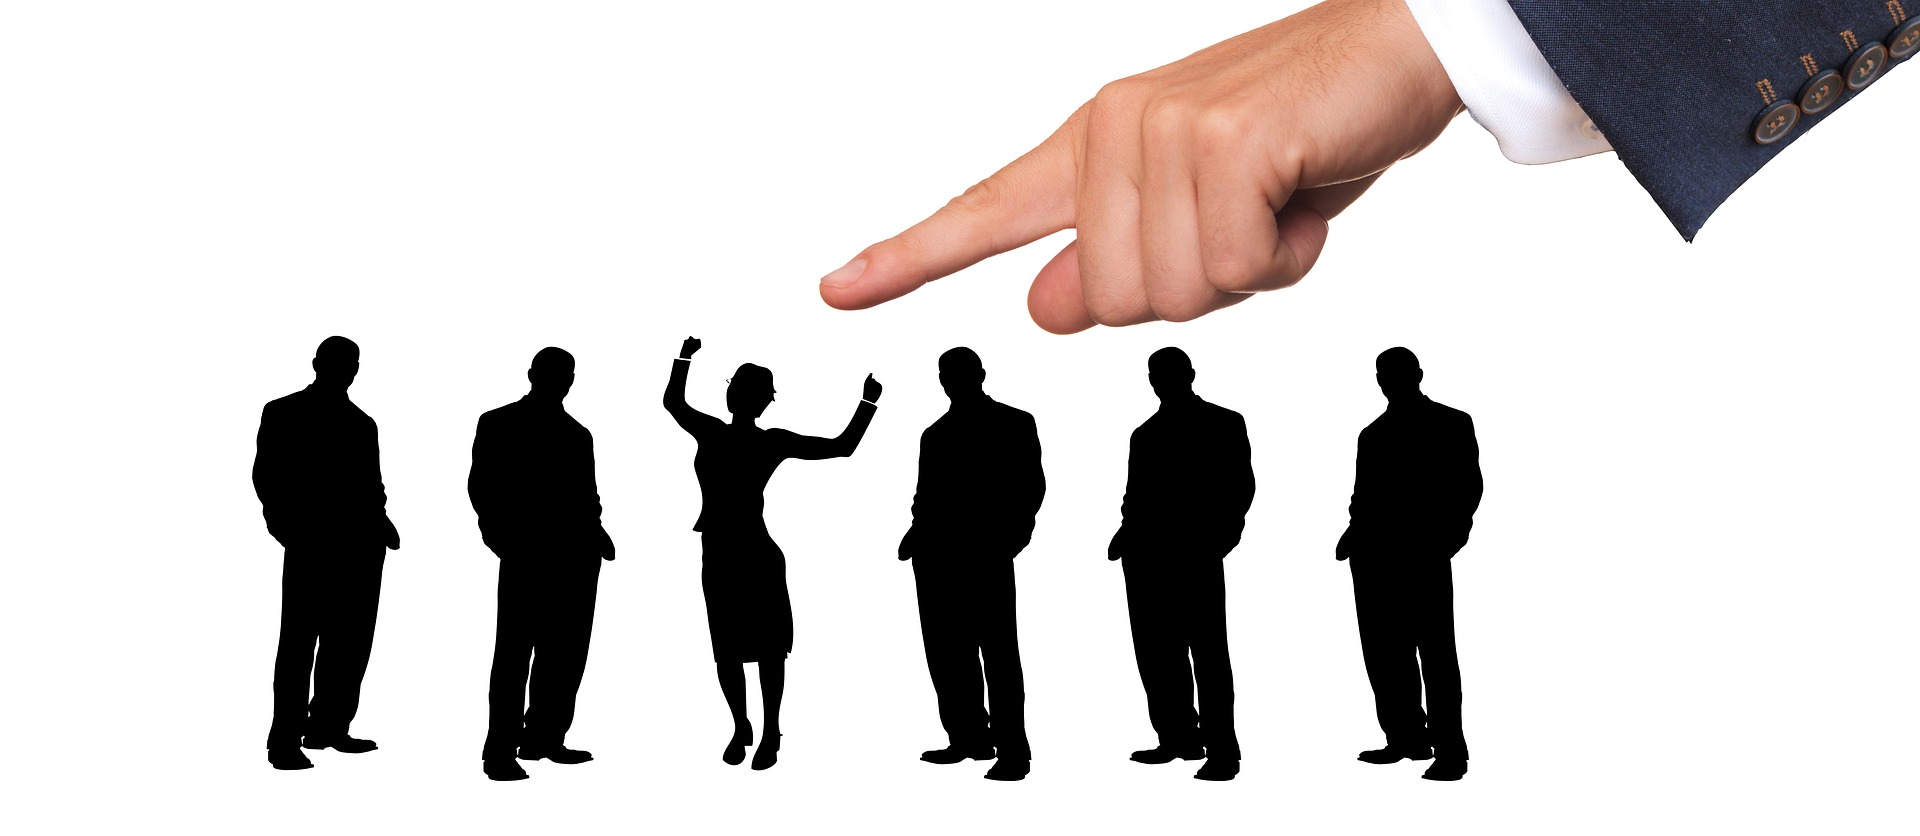

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing Required Libraries:-**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = 10,8

import warnings
warnings.filterwarnings('ignore')

**Load Data-set:-**

In [ ]:
df = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

**There is no need for column("sl_no") in our prediction so,we can remove it.**

In [ ]:
df.drop('sl_no',axis=1,inplace=True)
df.head()

In [ ]:
df.describe()

**Now,checking how many null values are present in the data-set and how much weighted it contains.**

In [ ]:
df.isnull().sum()

In [ ]:
missing_percentage = (df['salary'].isnull().sum()/len(df))*100
print(round(missing_percentage,2),'%')

In [ ]:
df.fillna(0,inplace=True)

df['salary'].isnull().sum()

**Let's check whether the data-set is Balanced or not?**

In [ ]:
df['status'].value_counts()

**We can call it as slighlty Imbalanced.**

In [ ]:
print("SSC Boards: ",df['ssc_b'].unique())

print("HSC Boards: ",df['hsc_b'].unique())

In [ ]:
mean_ssc_p = df.groupby('gender')['ssc_p'].mean()
mean_ssc_p

In [ ]:
mean_hsc_p = df.groupby('gender')['hsc_p'].mean()
mean_hsc_p

# Data Visualisation:-

In [ ]:
sns.set_style('darkgrid')
sns.set_context("talk",font_scale=0.8)
ax = sns.countplot(x='gender',hue='ssc_b',data=df)
ax.set_title("Students from SSC Boards\n",color='magenta',size=25)
ax.set_xlabel("Gender",color='b',size=20)
ax.set_ylabel("No. of Students",color='b',size=20)

for p in ax.patches:
    ax.text(p.get_x()+0.17, p.get_height()+1.15,int(p.get_height()))

**As we can see that in SSC no. of students are higher in Central board compared to state boards.**

In [ ]:
sns.set_style('darkgrid')
sns.set_context("talk",font_scale=0.8)
ax = sns.countplot(x='gender',hue='hsc_b',data=df)
ax.set_title("Students from HSC Boards\n",color = 'magenta',size=25)
ax.set_xlabel("Gender",color='b',size=20)
ax.set_ylabel("No. of Students",color='b',size=20)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.17, p.get_height()+0.30), va='bottom',
                    color= 'black')

**Whereas,in HSC there are state boards popular than Central board.**

**Now, check which streams are popular among the students in Higher Education.**

In [ ]:
sns.set_style('ticks')
sns.set_context("poster",font_scale=0.8)
ax = sns.countplot(x='gender',hue='hsc_s',data=df)
ax.set_title("Number of Students from different Streams\n",color = 'magenta',size=25)
ax.set_xlabel("Gender",color='b',size=20)
ax.set_ylabel("No. of Students",color='b',size=20)


for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.10, p.get_height()+0.02), va='bottom',
                    color= 'black')

**Most Students have preferred Commerce over Science as they likely to go in Marketing and Finance field.Whereas,Arts has least interest.**

In [ ]:
mean_degree_p = df.groupby('gender')['degree_p'].mean()
mean_degree_p

In [ ]:
print("Degree Streams: ",df['degree_t'].unique())

In [ ]:
sns.set_context("talk",font_scale=0.8)
ax = sns.countplot(x='gender',hue='degree_t',data=df)
ax.set_title("Degree Streams\n",color = 'magenta',size=25)
ax.set_xlabel("Gender",color = 'b',size=20)
ax.set_ylabel("No. of Students",color='b',size=20)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.10, p.get_height()+0.30), va='bottom',
                    color= 'black')

**As we see above graph that Commerce & Mgmt is the popular streams in all students, sci & tech comes second and all others streams shows less attractions among students.**

In [ ]:
sns.set_context("talk",font_scale=0.8)
ax = sns.countplot(x='degree_t',hue='specialisation',data=df)
ax.set_title("Job Category Vs Degree\n",color = 'magenta',size=25)
ax.set_xlabel("Degree",size=20,color = 'b')
ax.set_ylabel("No. of Students",size=20,color = 'b')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.15, p.get_height()+0.30), va='bottom',
                    color= 'black')

**Now, Let's See Which Streams have a higher percentage in getting Job.**

In [ ]:
sns.set_style("darkgrid")
sns.set_context('notebook',font_scale=1.4)
ax = sns.violinplot(y='degree_p',x='degree_t',data=df)
ax.set_title("Percentage based upon Degree\n",color = 'magenta',size=25)
ax.set_xlabel("Degree",size=20,color = 'b')
ax.set_ylabel("Degree %",size=20,color = 'b')

**Sci&Tech and Comm&Mgmt have almost simillar percentage**

**Now,let see which job market offers high annual income to candidate?**

In [ ]:
sns.set_style('whitegrid')
ax = sns.barplot(x='specialisation',y='salary',data=df,ci=None)
ax.set_xlabel("Job Category",color = 'red',size=20)
ax.set_ylabel("Annum Salary (Rs)",color='r',size=20)
ax.set_title("Highest Paid Job\n",color='magenta',size=25)

for p in ax.patches:
    ax.text(p.get_x()+0.20,p.get_height()+1.20,int(p.get_height()),size='x-large')

**Mrkt & Finance offers a good salary while Mrkt & HR gives decent money to candidate.**

# Outliers detection:-

In [ ]:
df.boxplot()

> **Looks Like there is no outliers present in the data-set.**

> **Dropping unnecessary Columns from the Data.**

In [ ]:
df.drop(['gender','ssc_b','hsc_b','hsc_s','mba_p'],axis=1,inplace=True)
df

**Converting all Object Data-types into int Data-types.**

In [ ]:
degree_n = {'Sci&Tech':0,'Comm&Mgmt':1,'Others':2}
workex_n = {'No':0,'Yes':1}
specialisation_n = {'Mkt&HR':0,'Mkt&Fin':1}
status_n = {'Not Placed':0,"Placed":1}

df['degree_t'] = df['degree_t'].map(degree_n)
df['workex'] = df['workex'].map(workex_n)
df['specialisation'] = df['specialisation'].map(specialisation_n)
df['status'] = df['status'].map(status_n)
df

In [ ]:
X = df.drop('status',axis=1)
y = df['status']

# **Splitting Data:-**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

# **Standardizing Data:-**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
sns.heatmap(round(df.corr(),2),annot=True)

In [ ]:
df.corr()['status'].sort_values(ascending=False)

**From the above data its clearly shows that salary feature is the highly correlated with status.**

# **Model Building:-**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("\nLogisticRegression: ",lr.score(X_test,y_test)/0.01)
print(30*'-')

y1_pred = lr.predict(X_test)

print("\nConfusion Metrics:\n",confusion_matrix(y_test,y1_pred))
print("\n\nClassification Report: ",classification_report(y_test,y1_pred))
print("\n\nF1-Score: ",f1_score(y_test,y1_pred))

In [ ]:
dt = DecisionTreeClassifier(min_samples_split=0.8,max_features=1,random_state=0)
dt.fit(X_train,y_train)
print("\nDecisionTreeClassifier: ",dt.score(X_test,y_test)/0.01)
print(30*'-')

y2_pred = dt.predict(X_test)

print("\nConfusion Metrics:\n",confusion_matrix(y_test,y2_pred))
print("\n\nClassification Report: ",classification_report(y_test,y2_pred))
print("\n\nF1-Score: ",f1_score(y_test,y2_pred))

In [ ]:
rf = RandomForestClassifier(n_estimators=200,criterion='gini',
 max_depth= 4 ,
 max_features= 'auto',random_state=42)
rf.fit(X_train,y_train)
print("\nRandomForestClassifier: ",rf.score(X_test,y_test)/0.01)
print(30*'-')

y3_pred = rf.predict(X_test)

print("\nConfusion Metrics:\n",confusion_matrix(y_test,y3_pred))
print("\n\nClassification Report: ",classification_report(y_test,y3_pred))
print("\n\nF1-Score: ",f1_score(y_test,y3_pred))

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
print("\nSVC: ",svc.score(X_test,y_test)/0.01)
print(30*'-')

y4_pred = svc.predict(X_test)

print("\nConfusion Metrics:\n",confusion_matrix(y_test,y4_pred))
print("\n\nClassification Report: ",classification_report(y_test,y4_pred))
print("\n\nF1-Score: ",f1_score(y_test,y4_pred))

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y4_pred),annot=True)
ax.set_xlabel('Predicted',color='b',size=20)
ax.set_ylabel('Truth',color='b',size=20)

# **SupportVectorClassifier gives 100% accuracy.**

**If you like my work then Please Upvote it.**

**Thank you for spending your precious time.**